In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
from scipy.constants import c, pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec

In [2]:
font = {
        'size'   : 7}
mpl.rc('font', **font)

In [3]:
def data(filename):
    filename = 'output_final/1/'+filename
    with open(filename+'.pickle','rb') as fid:
        obj = pickle.load(fid)
        plt.close()
    return obj

In [4]:
def DD_to__DDD(d,lmin,lmax):
    x,y,z = d
    fmin,fmax,rounds = 1e-3*c/lmax,1e-3*c/lmin, None
    i = np.where(np.abs(y - fmin) == np.min(np.abs(y - fmin)))[0][0]
    j = np.where(np.abs(y - fmax) == np.min(np.abs(y - fmax)))[0][0]
    X,Y = np.meshgrid(x,y[i:j])
    Z = z[i:j,:]
    low_values_indices = Z < -60  # Where values are low
    z[low_values_indices] = -60  # All low values set to 0
    return X,Y,Z

In [5]:
def plot_contorf(d,lmin,lmax):
    #%matplotlib inline
    X,Y,Z = DD_to__DDD(d[0],lmin,lmax)
    ZZ = np.max(Z)
    floor = -60
    fig  = plt.figure(figsize=(7,3.5))
    ax1 = fig.add_subplot(221)
    #im1 = ax1.contourf(X,1e-6*c/Y, Z,np.arange(-60,np.max(Z),1), extend = 'min',cmap=plt.cm.jet)
    im1 = ax1.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),0.2), extend = 'min',cmap=plt.cm.jet)
    
    #ax1.set_ylabel(r'Wavelength ($\mu m$)')
    ax1.axes.get_xaxis().set_visible(False)


    cbaxes = fig.add_axes([0.08, 1, 0.44, 0.025])
    cb = fig.colorbar(im1,cax=cbaxes,  orientation='horizontal')
    cb.set_label(r'$Spectrum (dB)$')
    cb.set_ticks(np.arange(floor,np.max(ZZ),10))
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')
    ax1.set_yscale("log")


    X,Y,Z = DD_to__DDD(d[1],lmin,lmax)
    ax2 = fig.add_subplot(223)
    ax2.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),0.2), extend = 'min',cmap=plt.cm.jet)
    ax2.set_xlabel(r'Rounds')
    #ax2.set_ylabel(r'Wavelength ($\mu m$)')

    ax2.set_yscale("log") 
    
    
    plt.tight_layout()
    plt.savefig('/home/john/storage/nextcloud/phd_years/conferences&posters/nusod/figures/fig2.pdf', bbox_inches = 'tight')
    plt.show()
    plt.close()
    
    return None

In [6]:
def plot_contorf(d,lmin,lmax):
    #%matplotlib inline
    X,Y,Z = DD_to__DDD(d[0],lmin,lmax)
    ZZ = np.max(Z)
    floor = np.max(ZZ) - 0.6
    floor = -60
    cmap = mpl.cm.plasma
    
    ylim  = [1.403, 1.406]
    ylim2 = [1.197, 1.203]


    ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
    ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])

    ylimratio_2 = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])

    ylim2ratio_2 = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
    
    contror_size = 0.3
    ylim2ratio, ylim2ratio_2  = ylimratio, ylimratio_2 
    outer = gridspec.GridSpec(2, 1, hspace = 0.1, height_ratios=[2*ylimratio, 2*ylim2ratio])
    gs1 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[0],hspace = 0.1, height_ratios= [ylimratio,ylim2ratio])
    gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec = outer[1],hspace = 0.1, height_ratios= [ylimratio_2,ylim2ratio_2])
    #gs[0:1].update(hspace = 0.1)
    #gs[1:2].update(hspace = 0.3)
    #gs[2:3].update(hspace = 0.1)

    fig = plt.figure(figsize=(3.5,3.5))
    ax = fig.add_subplot(gs1[0])
    im1 = ax.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),contror_size), extend = 'min',cmap=cmap )
    ax.set_ylim(ylim)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.tick_top()
    ax.tick_params(labeltop='off')
    ax.set_yticks([1.405])

    
    cbaxes = fig.add_axes([0.12, 0.9, 0.78, 0.025])
    cb = fig.colorbar(im1,cax=cbaxes,  orientation='horizontal')
    cb.set_label(r'$Spectrum (dB)$')
    tick = np.arange(floor,np.max(ZZ),10)
    str_tick = [str(i) for i in tick]
    str_tick[0] = r'$\leq$'+str(floor)
    cb.set_ticks(tick, str_tick)
    cb.ax.set_xticklabels(str_tick)
    cb.ax.xaxis.set_ticks_position('top')
    cb.ax.xaxis.set_label_position('top')


    ax2 = fig.add_subplot(gs1[1])
    ax2.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),contror_size), extend = 'min',cmap=cmap )
    ax2.set_ylim(ylim2)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.tick_bottom()
    #ax2.set_xlabel('xlabel')
    ax2.set_yticks([1.2])
    ax2.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)
    ax.axes.get_xaxis().set_visible(False)
    

    kwargs = dict(color='k', clip_on=False)
    xlim = ax.get_xlim()
    dx = .01*(xlim[1]-xlim[0])
    dy = .01*(ylim[1]-ylim[0])/ylimratio
    ax.plot((xlim[0]-dx,xlim[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
    ax.plot((xlim[1]-dx,xlim[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
    dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
    ax2.plot((xlim[0]-dx,xlim[0]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
    ax2.plot((xlim[1]-dx,xlim[1]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
    ax.set_xlim(xlim)
    ax2.set_xlim(xlim)
    ax2.axes.get_xaxis().set_visible(False)

    X,Y,Z = DD_to__DDD(d[1],lmin,lmax)

    ax3 = fig.add_subplot(gs2[0])
    ax3.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),contror_size), extend = 'min',cmap=cmap )
    ax3.set_ylim(ylim)

    ax3.tick_params(labeltop='off')
    ax3.xaxis.tick_top()
    ax3.spines['bottom'].set_visible(False)
    ax3.axes.get_xaxis().set_visible(False)
    ax3.set_yticks([1.405])
    

    ax4 = fig.add_subplot(gs2[1])
    ax4.contour(X,1e-6*c/Y, Z,np.arange(floor,np.max(ZZ),contror_size), extend = 'min',cmap=cmap )
    ax4.set_ylim(ylim2)
    ax4.xaxis.tick_bottom()
    ax4.spines['top'].set_visible(False)

    ax4.set_yticks([1.2])


    
    ax4.set_xlabel(r'Rounds')

    ax4.yaxis.set_label_coords(0.05, 0.5, transform=fig.transFigure)
    kwargs = dict(color='k', clip_on=False)
    xlim = ax.get_xlim()
    dx = .01*(xlim[1]-xlim[0])
    dy = .01*(ylim[1]-ylim[0])/ylimratio
    ax3.plot((xlim[0]-dx,xlim[0]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
    ax3.plot((xlim[1]-dx,xlim[1]+dx), (ylim[0]-dy,ylim[0]+dy), **kwargs)
    dy = .01*(ylim2[1]-ylim2[0])/ylim2ratio
    ax4.plot((xlim[0]-dx,xlim[0]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
    ax4.plot((xlim[1]-dx,xlim[1]+dx), (ylim2[1]-dy,ylim2[1]+dy), **kwargs)
    ax3.set_xlim(xlim)
    ax4.set_xlim(xlim)

    #plt.subplots_adjust(hspace=0.3)

    
    ax4.set_ylabel(r'Wavelength ($\mu m$)')
    ax4.yaxis.set_label_coords(-0.15,2.25)
    #plt.tight_layout()
    plt.savefig('/home/john/storage/nextcloud/phd_years/conferences&posters/nusod/figures/fig2.pdf', bbox_inches = 'tight',dpi = 400)
    plt.savefig('/home/john/storage/nextcloud/phd_years/conferences&posters/nusod/figures/fig2.png', bbox_inches = 'tight',dpi = 400)
  
    plt.show()
    #plt.close()
    
    
    
    
    return None

/home/john/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8191 but corresponding boolean dimension is 1553


<IPython.core.display.Javascript object>


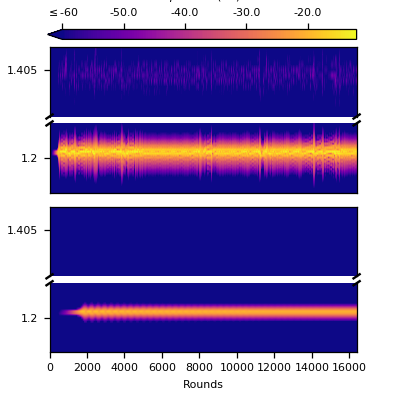

In [9]:
plot_contorf(d,1150,1450)

<IPython.core.display.Javascript object>


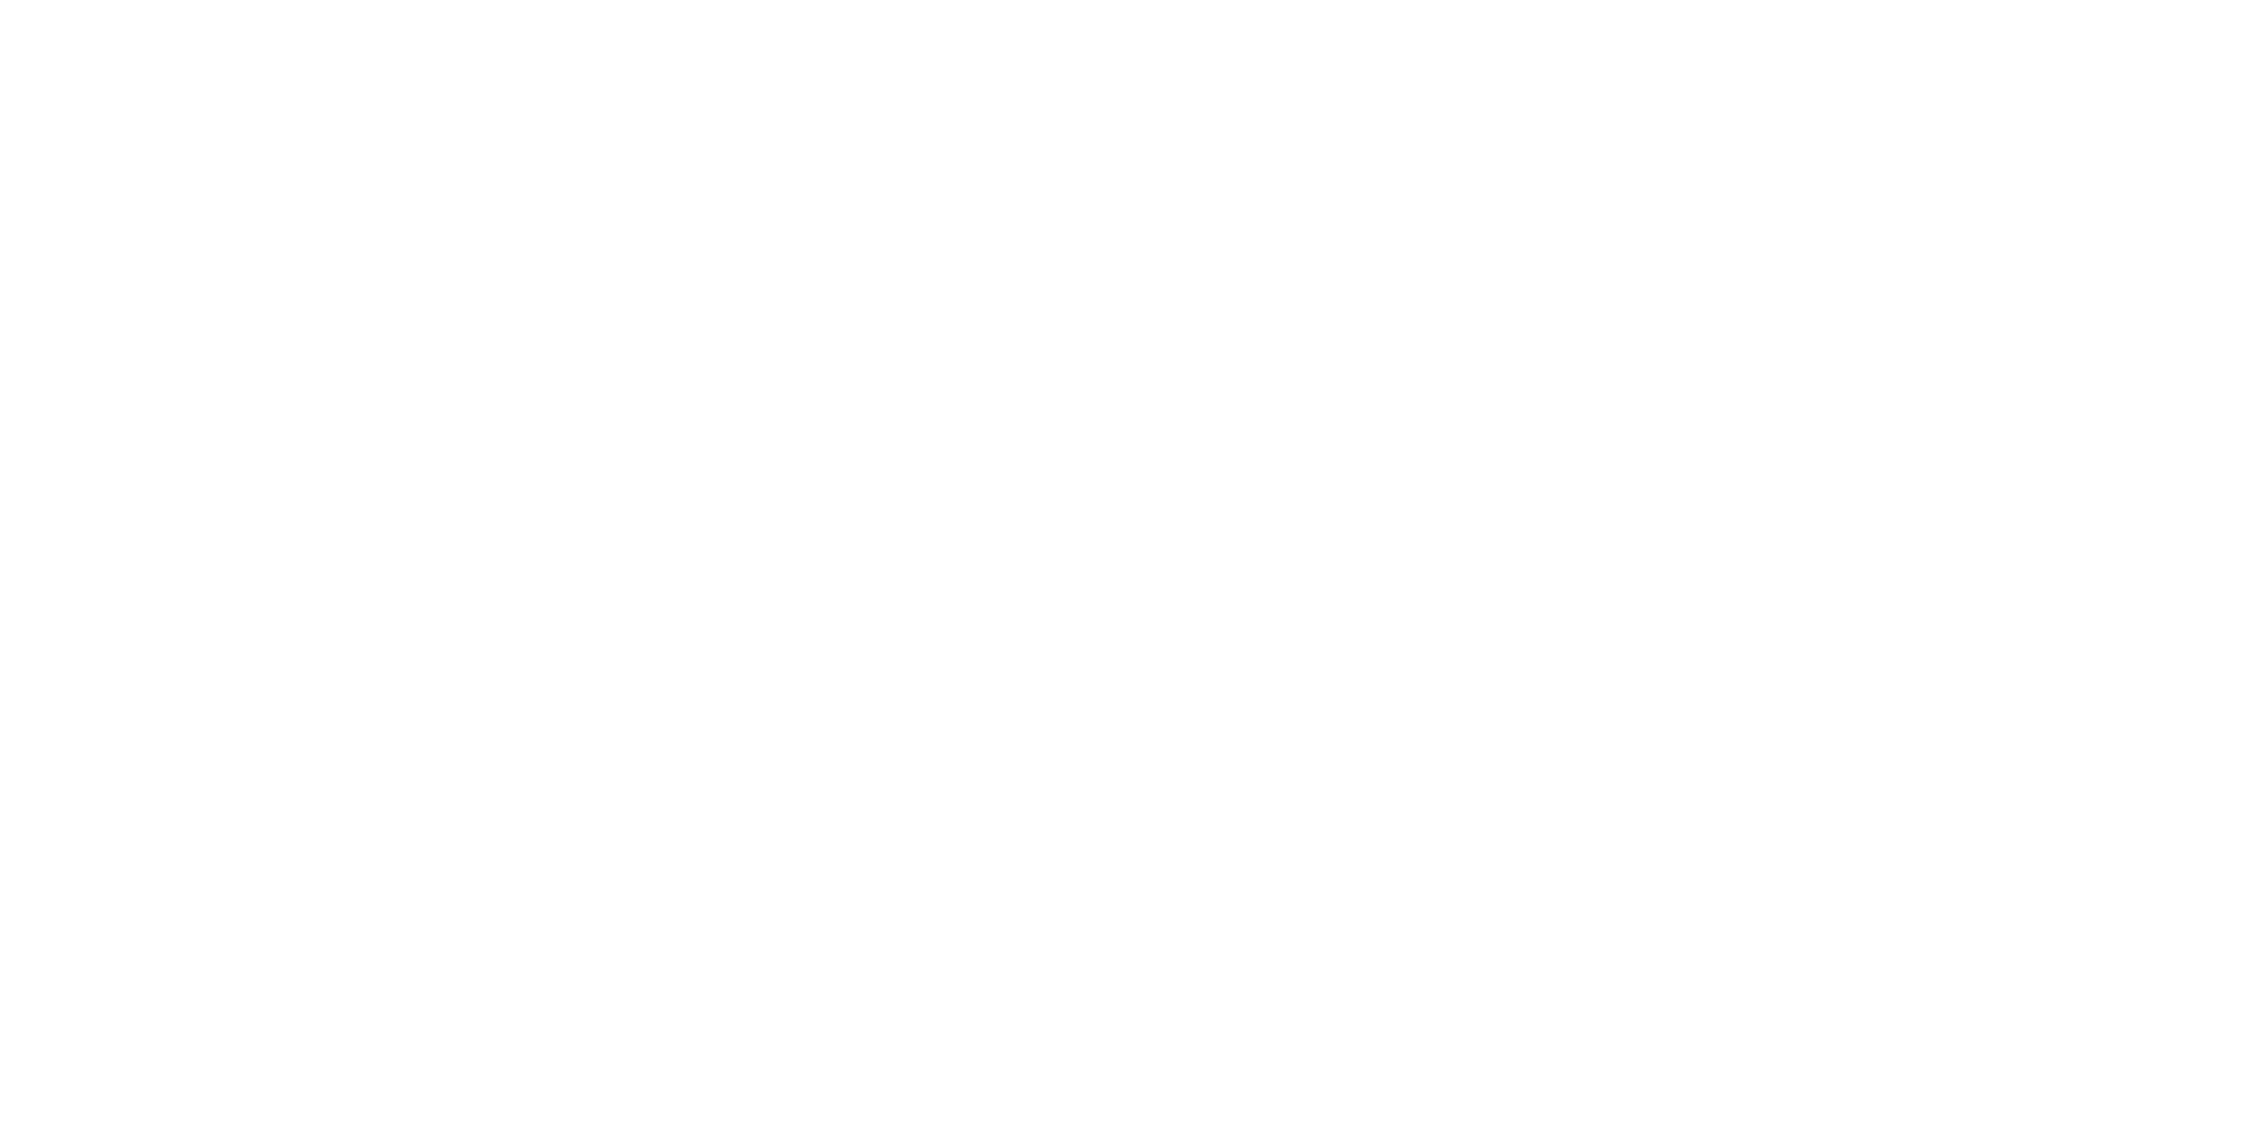

<IPython.core.display.Javascript object>


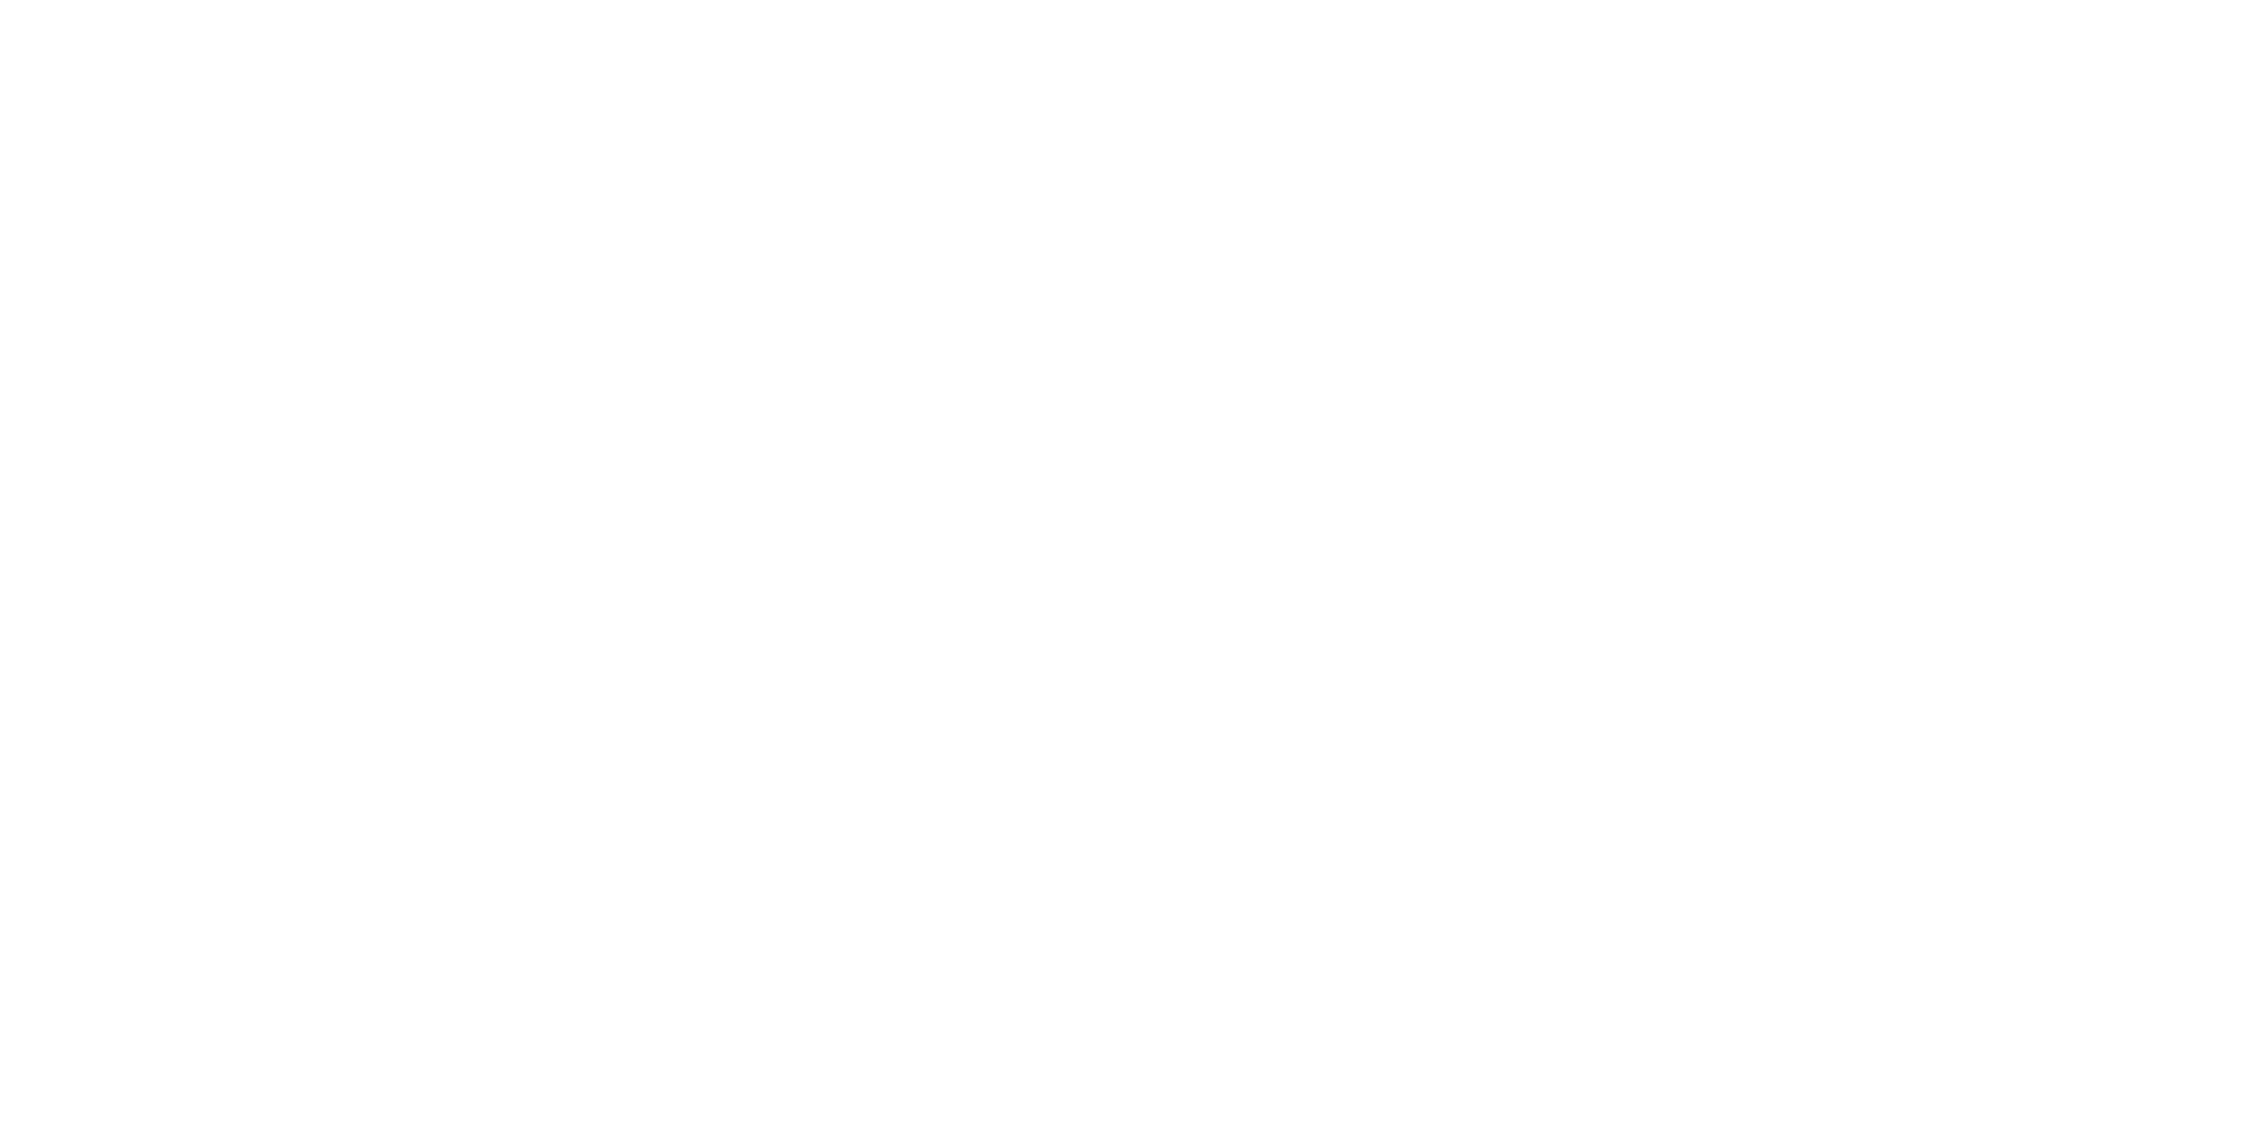

In [8]:
d = ()
filenames = ('0_1','0_2')
for file in filenames:
    d += (data(file)[1],)


In [ ]:
np.arange(0.5,5.5,1)

In [ ]:
def plot_power(d):
    fig  = plt.figure(figsize=(3.5,2))
    plt.plot(d[0][0],d[0][1], label = r'$1.4$ $dB$',linewidth = 0.8)
    plt.plot(d[1][0],d[1][1], label = r'$1.5$ $dB$',linewidth = 0.8)
    plt.xlabel(r'Rounds')
    plt.ylabel(r'Average Power ($W$)')
    plt.legend(ncol = 2)
    plt.tight_layout()
    plt.savefig('/home/john/storage/nextcloud/phd_years/conferences&posters/nusod/figures/fig3.pdf', bbox_inches = 'tight',dpi = 400)
    plt.show()
    return None

In [ ]:
def DDobj_to_data(filenames):
    d = ()
    for file in filenames:
        d += (data('power_per_round'+file),)
    x1 = d[0].gca().lines[0].get_xdata()
    y1 = d[0].gca().lines[0].get_ydata()
    x2 = d[1].gca().lines[0].get_xdata()
    y2 = d[1].gca().lines[0].get_ydata()
    return ((x1,y1),(x2,y2))

In [ ]:
d = ()

d = DDobj_to_data(filenames)

In [ ]:
plot_power(d)